# **Analysis of the book  "Harry Potter and the Philosopher's Stone" using NLP techniques**

# **Text preprocessing**

**1) Lowercasing**

**2) Punctuation removal**

**3) Stop words removal**

In [ ]:
#Text preprocessing
##Lowercasing
##Punctuation removal
##Stop words removal

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# from google.colab import files


file_path = '/content/Book1.txt'

# Opening the file for reading
#  with open('Harry Potter 1.txt', 'r', encoding='utf-8') as f:
with open(file_path, 'r') as f:
    text = f.read()

# Preprocessing
## reducing all symbols in the text to lowercase.
text = text.lower()

# removing all punctuation from text, leaving only letters, numbers and spaces.
text = re.sub(r'[^\w\s]', '', text)

#creating a list of stop words for the Russian language.
stop_words = stopwords.words('russian')

# splitting text into separate words, removing stop words from them, and joining text.
text1 = ' '.join([word for word in text.split() if word not in stop_words])
#print(text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Part-of-Speech (POS) Tagging**

Frequency of meaningful parts of speech

In [ ]:
# importing a library and functions
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

# defining a function called "pos_tagging" that takes a single argument called "file_path"
def pos_tagging(file_path):
# opening file
    with open(file_path, 'r') as file:
        text = file.read()

# using the "wordtokenize" function to split the text into individual tokens

    tokens = word_tokenize(text)
    # assign parts of speech to each word in the text
    tagged_words = pos_tag(tokens)

    nouns = 0
    adjectives = 0
    verbs = 0
    numerals = 0
# a loop to coup parts of speech
    for word, tag in tagged_words:
        if tag.startswith('N'):  # Nouns
            nouns += 1
        elif tag.startswith('J'):  # Adjectives
            adjectives += 1
        elif tag.startswith('V'):  # Verbs
            verbs += 1
        elif tag.startswith('CD'):  # Cardinal numbers (numerals)
            numerals += 1

    print(f'Number of nouns: {nouns}')
    print(f'Number of adjectives: {adjectives}')
    print(f'Number of verbs: {verbs}')
    print(f'Number of numerals: {numerals}')


file_path = '/content/Book1.txt'

pos_tagging(file_path)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Number of nouns: 26751
Number of adjectives: 6485
Number of verbs: 18721
Number of numerals: 551


# **Tokenisation**

For revealing 20 most frequent words in the text

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# importing a collection of common words
from nltk.corpus import stopwords
# it helps to calculate the frequency distribution of words
from nltk.probability import FreqDist
import string
nltk.download('punkt')
nltk.download('stopwords')
# defining the function
def tokenization(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    # tokenization and removing punctuation
    tokens = [word.lower() for word in word_tokenize(text) if word.isalnum()]

    # removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # calculating frequency distribution
    fdist = FreqDist(tokens)
    most_common_units = fdist.most_common(20)

    print("20 most popular meaningful units:")
    for unit, frequency in most_common_units:
        print(unit, ":", frequency)

# calling the tokenization function and passes file_path variable as an argument
tokenization(file_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20 most popular meaningful units:
harry : 1332
said : 794
ron : 425
hagrid : 370
hermione : 268
back : 254
one : 251
got : 206
could : 197
like : 193
get : 193
professor : 177
know : 176
see : 173
looked : 169
snape : 167
dumbledore : 157
around : 141
dudley : 137
going : 133


# **Stemming and Lemmatization**


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from textblob import Word
from google.colab import files
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Downloading stop words
stop_words = set(stopwords.words('english'))

In [ ]:
# Creating object for stemming
stemmer = SnowballStemmer('english')

In [ ]:
# showing the way to the file
file_path = '/content/Book1.txt'
# Opening the file for reading
with open(file1_path, 'r') as f:
    text = f.read()

In [ ]:
# Deleting punctuation marks
text = re.sub(r'[^\w\s]', '', text)

# Tokenization
tokens = word_tokenize(text, language='english')

# Deleting stop-words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Stemming
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Lemmatization

lemmatized_tokens = [Word(word).lemmatize() for word in stemmed_tokens]

print(stemmed_tokens[:10])
print(lemmatized_tokens[:10])

['chapter', 'one', 'boy', 'live', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet']
['chapter', 'one', 'boy', 'live', 'mr', 'mr', 'dursley', 'number', 'four', 'privet']


# **Exploratory data analysis**

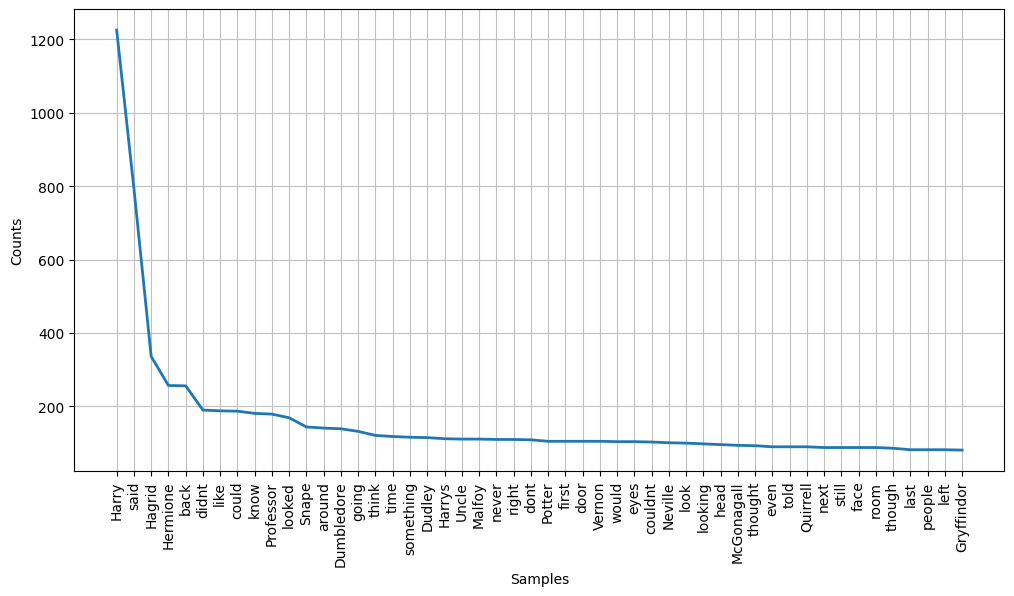

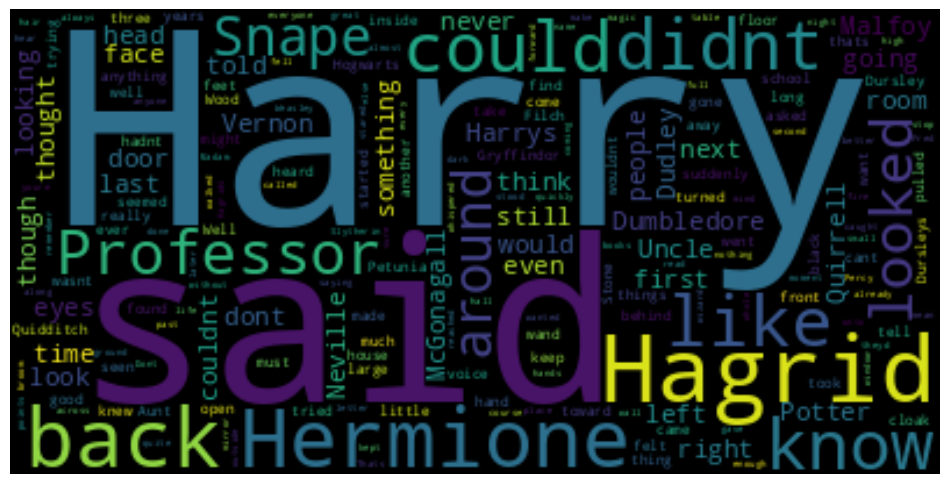

In [ ]:
# Compute the frequency of all words
frequency_dist = FreqDist(filtered_tokens)
sorted_frequency_dist = sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)


#Consider words with length greater than 3 and plot
plt.figure(figsize=(12, 6))

large_words = dict([(k, v) for k, v in frequency_dist.items() if len(k)>3])

frequency_dist = nltk.FreqDist(large_words)

frequency_dist.plot(50, cumulative=False)

#build wordcloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **N-grams**

In [ ]:
from textblob import TextBlob
from collections import Counter
ng = TextBlob(text1).ngrams(2)
ng_counter = Counter([" ".join(item) for item in ng])
for ngram, count in ng_counter.items():
    if count > 15:
        print(f"{ngram}: {count}")

the boy: 25
mrs dursley: 17
privet drive: 16
to say: 20
they were: 91
the last: 21
to be: 109
mr dursley: 30
was the: 44
of a: 48
he was: 194
was a: 99
have a: 29
a very: 39
on the: 217
the dursleys: 49
had a: 48
a small: 20
there was: 79
was no: 23
but they: 20
they didnt: 22
they could: 19
found out: 19
about the: 32
didnt have: 19
as it: 18
it was: 205
in the: 269
that the: 32
they had: 52
had never: 24
with a: 55
all over: 17
over the: 56
as he: 75
into his: 17
of them: 64
a large: 38
the window: 16
tried to: 49
at the: 141
left the: 16
the house: 35
out of: 146
the corner: 16
of the: 285
that he: 34
the first: 49
for a: 38
what he: 20
he had: 115
then he: 25
his head: 46
to look: 22
have been: 41
must have: 24
around the: 38
up the: 40
in his: 86
looking at: 22
a little: 24
of his: 62
he thought: 19
to get: 75
he couldnt: 33
seemed to: 57
be a: 18
a lot: 38
this was: 25
and his: 20
his eyes: 41
on a: 28
to see: 44
at all: 49
had to: 43
would be: 23
and a: 58
a few: 45
with his: 29

# **Term Frequency-Inverse Document Frequency**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# deleting punctuation marks
text = re.sub(r'[^\w\s]', '', text)

# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))

# tokenizing
vectorizer.fit([text])  # turning the text into the list of strings

# encode document
vector = vectorizer.transform([text])

# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

#Creating the Features
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit([text])

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'chapter one': 5945, 'one the': 25013, 'the boy': 34114, 'boy who': 4646, 'who lived': 40945, 'lived mr': 20538, 'mr and': 22439, 'and mrs': 1426, 'mrs dursley': 22456, 'dursley of': 8945, 'of number': 24257, 'number four': 23919, 'four privet': 11616, 'privet drive': 27044, 'drive were': 8610, 'were proud': 40317, 'proud to': 27136, 'to say': 36961, 'say that': 29175, 'that they': 33926, 'they were': 35812, 'were perfectly': 40311, 'perfectly normal': 26251, 'normal thank': 23507, 'thank you': 33674, 'you very': 42645, 'very much': 38633, 'much they': 22511, 'were the': 40352, 'the last': 34512, 'last people': 19671, 'people youd': 26194, 'youd expect': 42685, 'expect to': 9783, 'to be': 36658, 'be involved': 3241, 'involved in': 18186, 'in anything': 17671, 'anything strange': 2075, 'strange or': 32564, 'or mysterious': 25243, 'mysterious because': 22729, 'because they': 3478, 'they just': 35709, 'just didnt': 18986, 'didnt hold': 7773, 'hold with': 16840, 'with such': 41462, 'such 

# **Text Similarity**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

# reading the files
file1_path = '/content/Book1.txt'
file2_path = '/content/Book2.txt'
file3_path = '/content/Book3.txt'

with open(file1_path, 'r') as file:
    text1 = file.read().lower()

with open(file2_path, 'r') as file:
    text2 = file.read().lower()

with open(file3_path, 'r') as file:
    text3 = file.read().lower()

# removing stopwords
stop_words = set(stopwords.words('english'))
word_tokens1 = word_tokenize(text1)
word_tokens2 = word_tokenize(text2)
word_tokens3 = word_tokenize(text3)

filtered_text1 = [word for word in word_tokens1 if word not in stop_words]
filtered_text2 = [word for word in word_tokens2 if word not in stop_words]
filtered_text3 = [word for word in word_tokens3 if word not in stop_words]

# Calculate text similarity
text1_set = set(filtered_text1)
text2_set = set(filtered_text2)
text3_set = set(filtered_text3)

similarity_score12 = len(text1_set.intersection(text2_set)) / float(len(text1_set.union(text2_set)))
similarity_score23 = len(text2_set.intersection(text3_set)) / float(len(text2_set.union(text3_set)))
similarity_score13 = len(text1_set.intersection(text3_set)) / float(len(text1_set.union(text3_set)))

print("Similarity score between Book 1 and Book 2:", similarity_score12)
print("Similarity score between Book 2 and Book 3:", similarity_score23)
print("Similarity score between Book 1 and Book 3:", similarity_score13)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Similarity score between Book 1 and Book 2: 0.39133120560074125
Similarity score between Book 2 and Book 3: 0.41452705927269257
Similarity score between Book 1 and Book 3: 0.3767359401162218



# **Information extraction – NER – Entity recognition**

Using NLTK

In [ ]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tokenize import sent_tokenize

file_path = '/content/Book1.txt'

with open(file_path, 'r') as file:
    text = file.read()

sentences = sent_tokenize(text)
# creating an empty set to hold the proper names found in the text
proper_names = set()

for sentence in sentences:
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    named_entities = ne_chunk(tagged_words) #identifing named entities

# checking if the named entity is a person and occuring more than 2 times
    for entity in named_entities:
        if isinstance(entity, nltk.Tree):
            entity_name = " ".join([word for word, tag in entity.leaves()])
            if entity.label() in ["PERSON"]:
                if text.lower().count(entity_name.lower()) > 2:
                    proper_names.add((entity_name, entity.label()))

print("Proper names in the text:")
for name, label in proper_names:
    print(f"{name} is a {label}")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Proper names in the text:
Silver is a PERSON
Fungi is a PERSON
Ronan is a PERSON
Hufflepuffs is a PERSON
Don is a PERSON
Funny is a PERSON
Uncle is a PERSON
Bettie Bott is a PERSON
Patil is a PERSON
Dumbledore is a PERSON
Malfoy is a PERSON
Professor Sprout is a PERSON
Rubeus is a PERSON
Aunt Petunia is a PERSON
Oliver Wood is a PERSON
Dragon is a PERSON
Right is a PERSON
Albus is a PERSON
Tricky is a PERSON
Smoke is a PERSON
Figg is a PERSON
Stone is a PERSON
Look is a PERSON
Magical Herbs is a PERSON
Ginny is a PERSON
Sniff is a PERSON
Teach is a PERSON
Aren is a PERSON
Mother is a PERSON
Mom is a PERSON
Heads is a PERSON
Professor Dumbledore is a PERSON
Ollivander is a PERSON
Ron is a PERSON
Stick is a PERSON
Fred Weasley is a PERSON
Abou is a PERSON
Listen is a PERSON
Houses is a PERSON
How is a PERSON
Yeh is a PERSON
Hufflepuff is a PERSON
Malkin is a PERSON
Hermione Granger is a PERSON
Password is a PERSON
Norbert is a PERSON
Stonewall High is a PERSON
Fluffy is a PERSON
Exciteme

Using SpaCy

In [ ]:
import spacy
# loading the English language model provided by spacy.
nlp = spacy.load("en_core_web_sm")

file_path = '/content/Book1.txt'

with open(file_path, 'r') as file:
    text = file.read()

doc = nlp(text)

proper_names = set()

for entity in doc.ents:
    if entity.label_ in ["PERSON"]:
        if text.lower().count(entity.text.lower()) > 2:
            proper_names.add((entity.text, entity.label_))

print("Proper names in the text:")
for name, label in proper_names:
    print(f"{name} is a {label}")

Proper names in the text:
Fungi is a PERSON
Ronan is a PERSON
Don is a PERSON
Uncle is a PERSON
Patil is a PERSON
Dumbledore is a PERSON
Malfoy is a PERSON
Harry stared is a PERSON
Aunt Petunia is a PERSON
H.
“ is a PERSON
Oliver Wood is a PERSON
Albus is a PERSON
Figg is a PERSON
Ginny is a PERSON
Mother is a PERSON
Mom is a PERSON
Ollivander is a PERSON
Ron is a PERSON
Fred Weasley is a PERSON
Hermione Granger is a PERSON
Norbert is a PERSON
Yeh is a PERSON
Hufflepuff is a PERSON
Malkin is a PERSON
nothin’ is a PERSON
Harry’s is a PERSON
Crabbe and Goyle is a PERSON
Stonewall High is a PERSON
Nicholas is a PERSON
Hannah is a PERSON
Cupboard is a PERSON
Pomfrey is a PERSON
Hermione is a PERSON
Harry Potter is a PERSON
Quirrell is a PERSON
Dudley is a PERSON
McGonagall is a PERSON
Fred and George is a PERSON
Harry kept is a PERSON
Stonewall is a PERSON
James Potter is a PERSON
Marcus Flint is a PERSON
Ronald Weasley is a PERSON
Seamus Finnigan is a PERSON
Norris is a PERSON
Fred and Ge

# **Topic modeling**



In [ ]:
#Topic modeling

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

processed_docs = []


# from google.colab import files
# upload the file to the Google server
# uploaded = files.upload()
file1_path = '/content/Book1.txt'
# open the file with the text
# with open('Harry Potter 1.txt', 'r', encoding='utf-8') as f:
with open(file1_path, 'r') as f:
    for line in f:
        processed_docs.append(preprocess(line))

dictionary = gensim.corpora.Dictionary(processed_docs)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

#Displays 10 topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic: 0 
Words: 0.032*"say" + 0.031*"look" + 0.019*"harri" + 0.014*"hagrid" + 0.014*"professor" + 0.011*"know" + 0.010*"mcgonagal" + 0.008*"like" + 0.008*"go" + 0.007*"door"
Topic: 1 
Words: 0.054*"say" + 0.045*"harri" + 0.018*"know" + 0.012*"think" + 0.012*"look" + 0.010*"right" + 0.010*"hagrid" + 0.009*"like" + 0.008*"hermion" + 0.008*"come"
Topic: 2 
Words: 0.025*"harri" + 0.011*"know" + 0.011*"go" + 0.010*"look" + 0.009*"say" + 0.008*"hagrid" + 0.008*"year" + 0.007*"gryffindor" + 0.005*"great" + 0.005*"hous"
Topic: 3 
Words: 0.037*"harri" + 0.018*"hagrid" + 0.017*"say" + 0.012*"vernon" + 0.012*"go" + 0.011*"uncl" + 0.009*"tell" + 0.008*"hous" + 0.007*"like" + 0.007*"gryffindor"
Topic: 4 
Words: 0.041*"harri" + 0.022*"say" + 0.015*"hagrid" + 0.014*"look" + 0.011*"hermion" + 0.010*"think" + 0.009*"dumbledor" + 0.009*"go" + 0.008*"uncl" + 0.008*"know"
Topic: 5 
Words: 0.043*"harri" + 0.012*"look" + 0.009*"like" + 0.008*"room" + 0.007*"hagrid" + 0.007*"professor" + 0.007*"door" + 0.00

# **Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
#Sentiment analzsis
# import the VADER library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# create a model object
sentiment_model = SentimentIntensityAnalyzer()

# split the text into sentences
sentences = text.split(".")

# create an empty list to store analysis results
sentiment_results = []

# for each sentence we get its tone
for sentence in sentences:
  # get a dictionary with sentiment ratings
  scores = sentiment_model.polarity_scores(sentence)
  # add the dictionary to the list of results
  sentiment_results.append(scores)

# display a list of results
print(sentiment_results)


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.8779}, {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.5423}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4927}, {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.143, 'neu': 0.664, 'pos': 0.193, 'compound': 0.3612}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, '